Connection to Kaggle

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: remilsalim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset


100%|██████████| 268k/268k [00:00<00:00, 12.0MB/s]

Import Libraries & Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/alzheimers-disease-dataset/alzheimers_disease_data.csv')

Getting to Know the Variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Datatypes

In [6]:
df.dtypes

,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


Checking Numerical Features

In [7]:
# Numeric Features
print(f"Number of Numeric Features: {len(df.select_dtypes(include=['int', 'float']).columns)}")
print("-"*50)
print(f"Numeric Feature's Name: \n{df.select_dtypes(include=['int', 'float']).columns}")

Number of Numeric Features: 34
--------------------------------------------------
Numeric Feature's Name: 
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


Drop DoctorInCharge

In [8]:
df = df.drop(columns=['DoctorInCharge'], axis=1)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


Checking total possible values

In [9]:
df.nunique()

,0
PatientID,2149
Age,31
Gender,2
Ethnicity,4
EducationLevel,4
BMI,2149
Smoking,2
AlcoholConsumption,2149
PhysicalActivity,2149
DietQuality,2149


Missing Values & Duplicates

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


 Statistical Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


Prepare Data For Modelling

In [11]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1).values
y = df['Diagnosis'].values

Split the data into training and testing sets

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [13]:
print(f"X Train :{X_train.shape}")
print(f"X Validation :{X_val.shape}")
print(f"X Test :{X_test.shape}")
print(f"y Train :{y_train.shape}")
print(f"y Validation :{y_val.shape}")
print(f"y Test :{y_test.shape}")

X Train :(644, 32)
X Validation :(501, 32)
X Test :(1004, 32)
y Train :(644,)
y Validation :(501,)
y Test :(1004,)


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Split Data

In [16]:
import tensorflow as tf

In [17]:
print(X_train)

[[ 0.60698041 -1.05098771 -0.72183821 ... -0.42620579 -0.42874646
  -0.64933316]
 [ 1.04385706 -1.05098771 -0.72183821 ... -0.42620579 -0.42874646
  -0.64933316]
 [-0.26677289 -1.05098771  0.29093697 ... -0.42620579 -0.42874646
  -0.64933316]
 ...
 [ 1.15307622 -1.05098771  0.29093697 ... -0.42620579 -0.42874646
  -0.64933316]
 [ 1.58995287  0.95148591 -0.72183821 ... -0.42620579 -0.42874646
  -0.64933316]
 [-0.37599205 -1.05098771  1.30371215 ... -0.42620579 -0.42874646
  -0.64933316]]


In [18]:
print(y_train)

[0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 

XG Boost

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Initialize the model
model = xgb.XGBClassifier()

In [22]:
!pip install scikit-learn==1.3.0 # Downgrade scikit-learn to a compatible version
!pip install --upgrade xgboost # Upgrade xgboost to latest version

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the model
model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Make predictions
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


[0]	validation_0-logloss:0.47138
[1]	validation_0-logloss:0.37959
[2]	validation_0-logloss:0.33111
[3]	validation_0-logloss:0.30179
[4]	validation_0-logloss:0.27579
[5]	validation_0-logloss:0.25709
[6]	validation_0-logloss:0.24420
[7]	validation_0-logloss:0.23854
[8]	validation_0-logloss:0.23389
[9]	validation_0-logloss:0.23161
[10]	validation_0-logloss:0.22938
[11]	validation_0-logloss:0.22650
[12]	validation_0-logloss:0.22386
[13]	validation_0-logloss:0.22464
[14]	validation_0-logloss:0.22571
[15]	validation_0-logloss:0.22418
[16]	validation_0-logloss:0.22346
[17]	validation_0-logloss:0.22417
[18]	validation_0-logloss:0.22373
[19]	validation_0-logloss:0.22246
[20]	validation_0-logloss:0.22114
[21]	validation_0-logloss:0.22207
[22]	validation_0-logloss:0.22289
[23]	validation_0-logloss:0.22308
[24]	validation_0-logloss:0.22541
[25]	validation_0-logloss:0.22614
[26]	validation_0-logloss:0.22683
[27]	validation_0-logloss:0.22592
[28]	validation_0-logloss:0.22710
[29]	validation_0-loglos

KNN

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load your dataset 'df'
df = pd.read_csv('/content/alzheimers-disease-dataset/alzheimers_disease_data.csv')

# Prepare data for modeling
X = df.drop(['Diagnosis', 'PatientID'], axis=1)  # Keep as DataFrame for encoding
y = df['Diagnosis'].values

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Iterate through columns and encode if they are of type 'object'
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

# Convert X to numpy array after encoding
X = X.values

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN model: {accuracy:.4f}")

# Make predictions on the validation set
y_val_pred = knn_model.predict(X_val)  # Predict on validation set

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Accuracy of KNN model on validation set: {val_accuracy:.4f}")

Accuracy of KNN model: 0.5777
Accuracy of KNN model on validation set: 0.5968


Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No maximum depth (fully grown trees)
    random_state=42,        # Reproducibility
    n_jobs=-1               # Use all available processors for faster computation
)

In [10]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9001996007984032

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       327
           1       0.96      0.75      0.84       174

    accuracy                           0.90       501
   macro avg       0.92      0.86      0.88       501
weighted avg       0.91      0.90      0.90       501



In [12]:
# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.8934262948207171

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       651
           1       0.97      0.72      0.83       353

    accuracy                           0.89      1004
   macro avg       0.92      0.85      0.87      1004
weighted avg       0.90      0.89      0.89      1004



In [13]:
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9001996007984032
Test Accuracy: 0.8934262948207171


Logic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = log_reg_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))

# Optionally, evaluate the model on the test set
y_test_pred = log_reg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8363273453093812

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       327
           1       0.78      0.73      0.76       174

    accuracy                           0.84       501
   macro avg       0.82      0.81      0.82       501
weighted avg       0.83      0.84      0.83       501

Test Accuracy: 0.8366533864541833

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       651
           1       0.80      0.72      0.76       353

    accuracy                           0.84      1004
   macro avg       0.83      0.81      0.82      1004
weighted avg       0.83      0.84      0.83      1004



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.8363273453093812
Test Accuracy: 0.8366533864541833


Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_val_pred = svm_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.6526946107784432

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       327
           1       0.00      0.00      0.00       174

    accuracy                           0.65       501
   macro avg       0.33      0.50      0.39       501
weighted avg       0.43      0.65      0.52       501



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.8363273453093812
Test Accuracy: 0.8366533864541833


Graph for Validation set accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


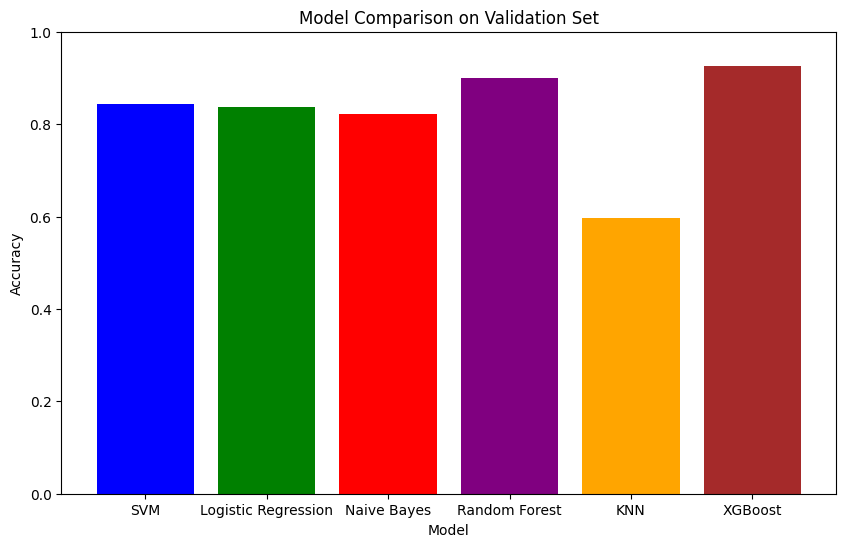

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# List to store the accuracy results
accuracy_results = []

# Loop through each model, fit it, and calculate accuracy on validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_val_pred = model.predict(X_val)  # Predict on validation set
    accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
    accuracy_results.append(accuracy)  # Store accuracy result

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_results, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Validation Set')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


Test data accuracy graph

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


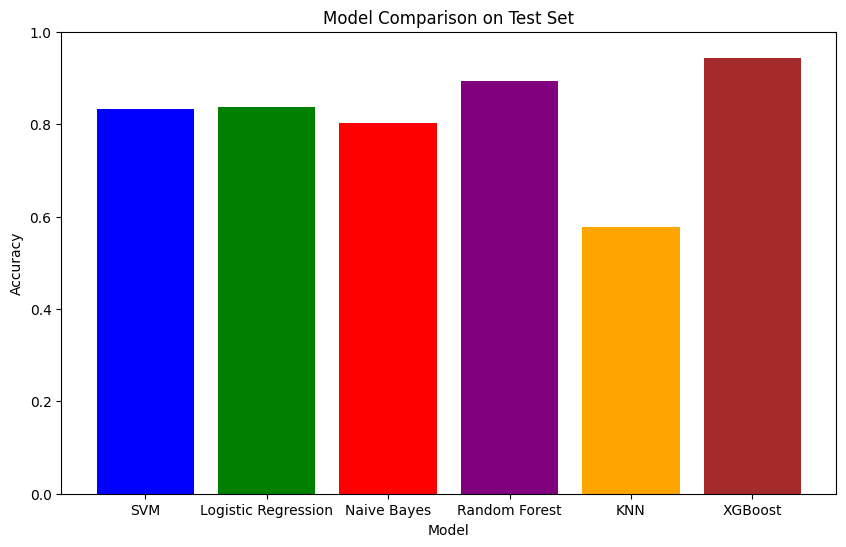

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# List to store the accuracy results on the test set
test_accuracy_results = []

# Loop through each model, fit it, and calculate accuracy on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_test_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
    test_accuracy_results.append(accuracy)  # Store accuracy result

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), test_accuracy_results, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Test Set')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


Precision of Validation Set

In [22]:
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Loop through each model, fit it, and calculate precision on the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_val_pred = model.predict(X_val)  # Predict on validation set

    # Calculate Precision
    precision = precision_score(y_val, y_val_pred, average='binary')  # Adjust 'average' for multi-class
    print(f"{model_name} Precision: {precision:.4f}")


SVM Precision: 0.8000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Precision: 0.7840
Naive Bayes Precision: 0.7640
Random Forest Precision: 0.9559
KNN Precision: 0.3852
XGBoost Precision: 0.9419


Precision for Test set

In [23]:
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Initialize the models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Loop through each model, fit it, and calculate precision on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_test_pred = model.predict(X_test)  # Predict on test set

    # Calculate precision
    precision = precision_score(y_test, y_test_pred, average='binary')  # Change to 'micro', 'macro', or 'weighted' for multi-class
    print(f"Precision for {model_name}: {precision:.4f}")


Precision for SVM: 0.7893


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision for Logistic Regression: 0.7981
Precision for Naive Bayes: 0.7429
Precision for Random Forest: 0.9659
Precision for KNN: 0.3746
Precision for XGBoost: 0.9512


In [ ]:
# Save pickle
import pickle

with open("model.pkl","wb") as file1:
  pickle.dump(model,file1)

Save the Model

In [ ]:
# Save h5
model.save('ann.h5')